# SUYASH PRATAP SINGH(181B226)

# TASKS:-
1. Download the csv file for time series data about Covid-19 cases in India.
2. Pre-process the data to check about any missing data.
3. Plot the time series to visualise it.
4. Identify the trend, seasonality and remainder parts of the time series.
5. Identify the SARIMAX parameters
6. Forecast the time series for next 100 days.
7. Plot your forecasted data along with the original data.

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
kp = pd.read_csv(r'C:\Users\Admin\Downloads\case_time_series.csv')

In [3]:
#print first five row
kp.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,01-Feb,0,1,0,0,0,0
3,02-Feb,1,2,0,0,0,0
4,03-Feb,1,3,0,0,0,0


In [4]:
kp['Date'] = pd.to_datetime(kp['Date']+'-20', format='%d-%b-%y')
kp

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
88,2020-04-27,1568,29458,580,7103,58,939
89,2020-04-28,1902,31360,636,7739,69,1008
90,2020-04-29,1705,33065,690,8429,71,1079
91,2020-04-30,1801,34866,630,9059,75,1154


In [5]:
#print random five row
kp.sample(5)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
79,2020-04-18,1371,15725,426,2466,35,522
62,2020-04-01,424,2059,19,169,6,53
73,2020-04-12,758,9211,114,1086,42,332
33,2020-03-03,1,6,0,3,0,0
64,2020-04-03,560,3105,39,230,14,83


In [6]:
#full information
kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             93 non-null     datetime64[ns]
 1   Daily Confirmed  93 non-null     int64         
 2   Total Confirmed  93 non-null     int64         
 3   Daily Recovered  93 non-null     int64         
 4   Total Recovered  93 non-null     int64         
 5   Daily Deceased   93 non-null     int64         
 6   Total Deceased   93 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.2 KB


In [7]:
#statistical information
kp[['Date']].describe()

,Date
count,93
unique,93
top,2020-03-13 00:00:00
freq,1
first,2020-01-30 00:00:00
last,2020-05-01 00:00:00


In [8]:
# unstacking the data
kp.unstack().head()

Date  0    2020-01-30 00:00:00
      1    2020-01-31 00:00:00
      2    2020-02-01 00:00:00
      3    2020-02-02 00:00:00
      4    2020-02-03 00:00:00
dtype: object

In [9]:
kp.unstack().head().values

array([Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
       Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'),
       Timestamp('2020-02-03 00:00:00')], dtype=object)

In [10]:
kp['Date'].min(), kp['Date'].max()

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-05-01 00:00:00'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001987D5031F0>,
      dtype=object)

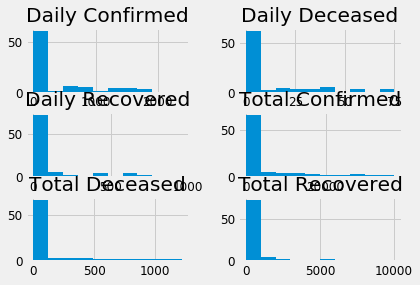

In [11]:
kp.hist()

In [12]:
kp.columns

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [13]:
kp.index

RangeIndex(start=0, stop=93, step=1)

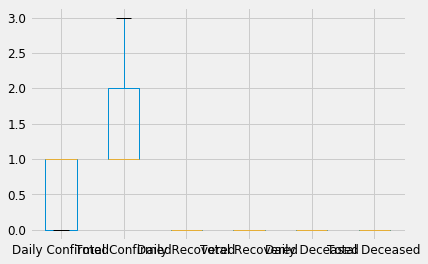

In [14]:
kp.head().boxplot()

In [15]:
kp.isnull().sum()

Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [16]:
kp= kp.sort_values('Date')
kp.isnull().sum()


Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [17]:
len(kp)

93

In [18]:
kp = kp.groupby('Date')['Daily Confirmed'].sum().reset_index()

In [19]:
kp = kp.set_index('Date')
kp.index = pd.to_datetime(kp.index)
kp.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

In [20]:
y = kp['Daily Confirmed'].resample('W').mean()

In [21]:
y.index

DatetimeIndex(['2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [22]:
y['2020':]

Date
2020-02-02       0.500000
2020-02-09       0.142857
2020-02-16       0.000000
2020-02-23       0.000000
2020-03-01       0.000000
2020-03-08       5.142857
2020-03-15      10.428571
2020-03-22      41.571429
2020-03-29     105.142857
2020-04-05     450.571429
2020-04-12     702.571429
2020-04-19    1156.285714
2020-04-26    1512.142857
2020-05-03    1873.400000
Freq: W-SUN, Name: Daily Confirmed, dtype: float64

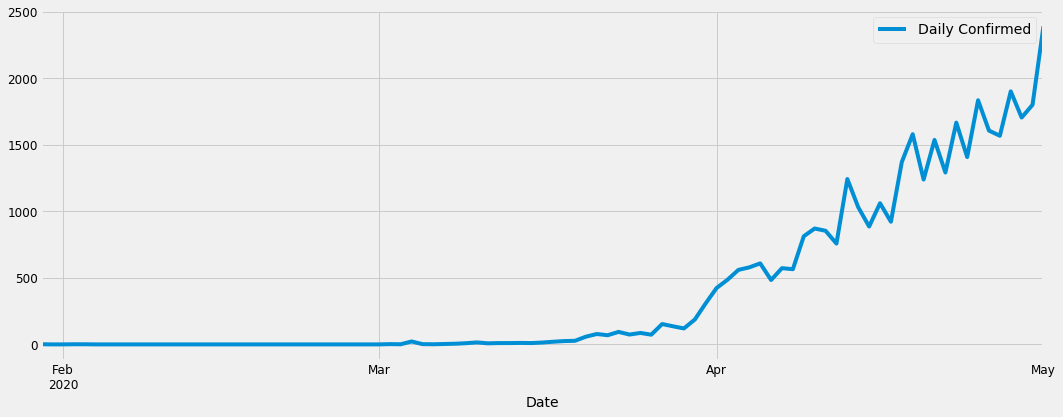

In [23]:
kp.plot(figsize=(16, 6))
plt.show()

In [24]:
y.fillna(method='ffill',inplace=True) #Handling the missing value

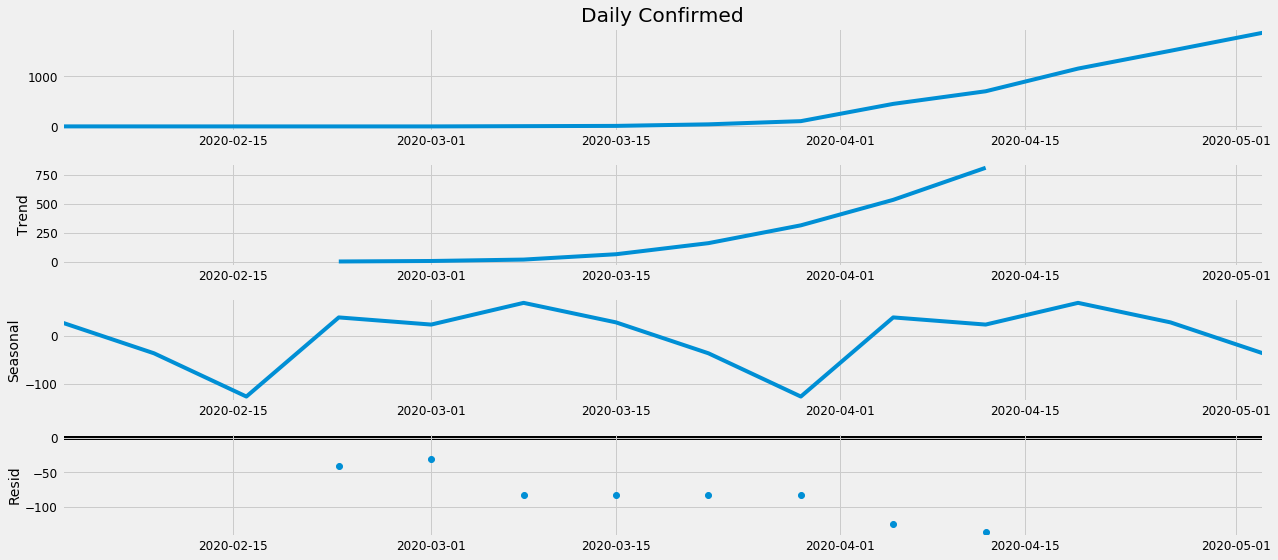

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y,freq=6,model='additive')
fig = decomposition.plot()
plt.show()  #x must have 2 complete cycles requires 104 observations. x only has 14 observation(s):-freq=7

In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:211.92452135174656
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:21.90873976828057
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:19.91815079494886
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:37.22588383766065
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:23.90751082102666
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:188.30999133092075


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:39.28209806737616
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:166.86879376113723
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:5.285428631112563
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:150.30054865437197
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-1.2891822924210592
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:164.81248757301356


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-1.8134136036754276
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-3.0160183369146836
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:10.83766813551634
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1.6920154333967572
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:153.97658215516896
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:15.678086400549422
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:150.44277957771686
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:139.92266006794583
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:10.0


In [28]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

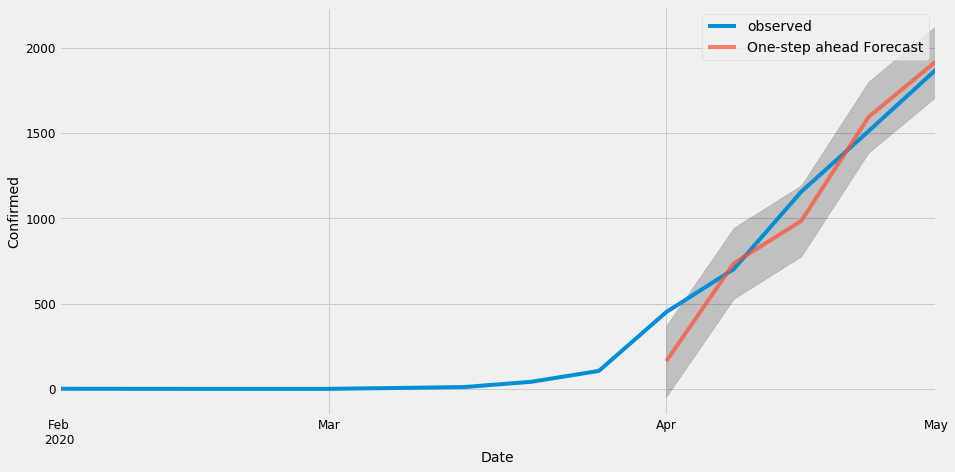

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2020-04-05'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed')
plt.legend()
plt.show()

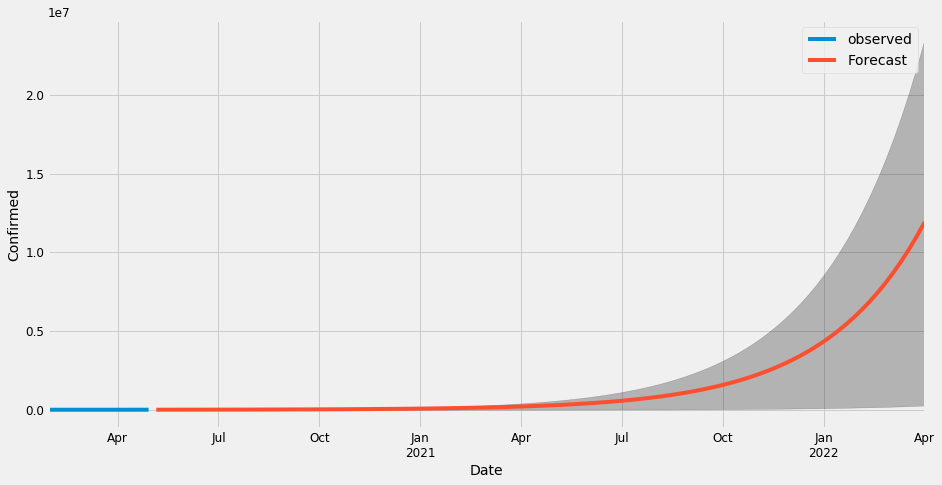

In [30]:
import matplotlib.pyplot as plt
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed')
plt.legend()
plt.show()

# THANK YOU